In [1]:
#### import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from processed_data_class import processed_data_class as PDC
%matplotlib notebook
import warnings
import numpy as np
warnings.filterwarnings('ignore')

Loaded processed_data for run run_166
Loaded processed_data for run run_167
Loaded processed_data for run run_170
Loaded processed_data for run run_172
Loaded processed_data for run run_174


<IPython.core.display.Javascript object>


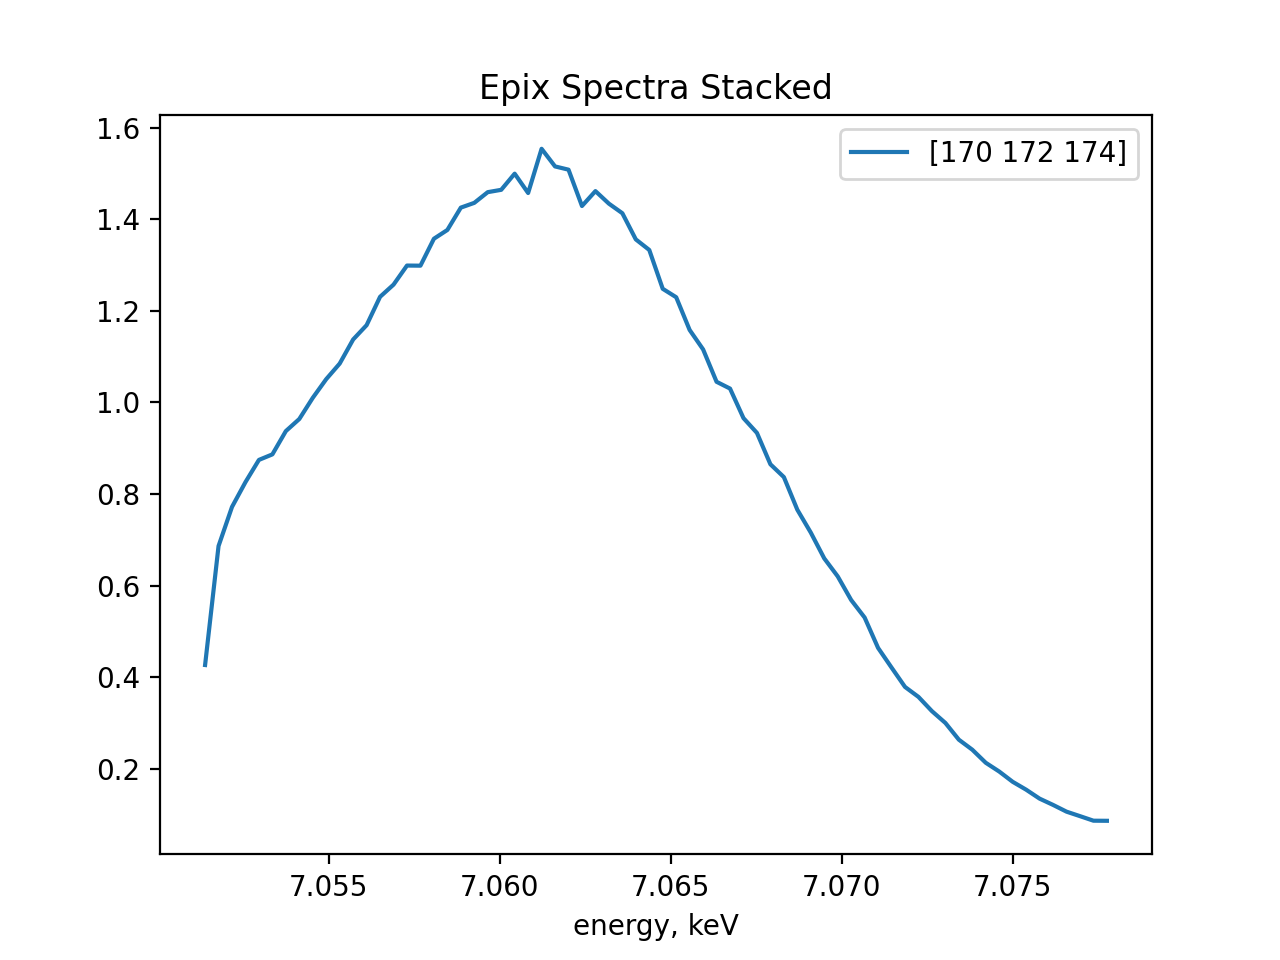

<IPython.core.display.Javascript object>


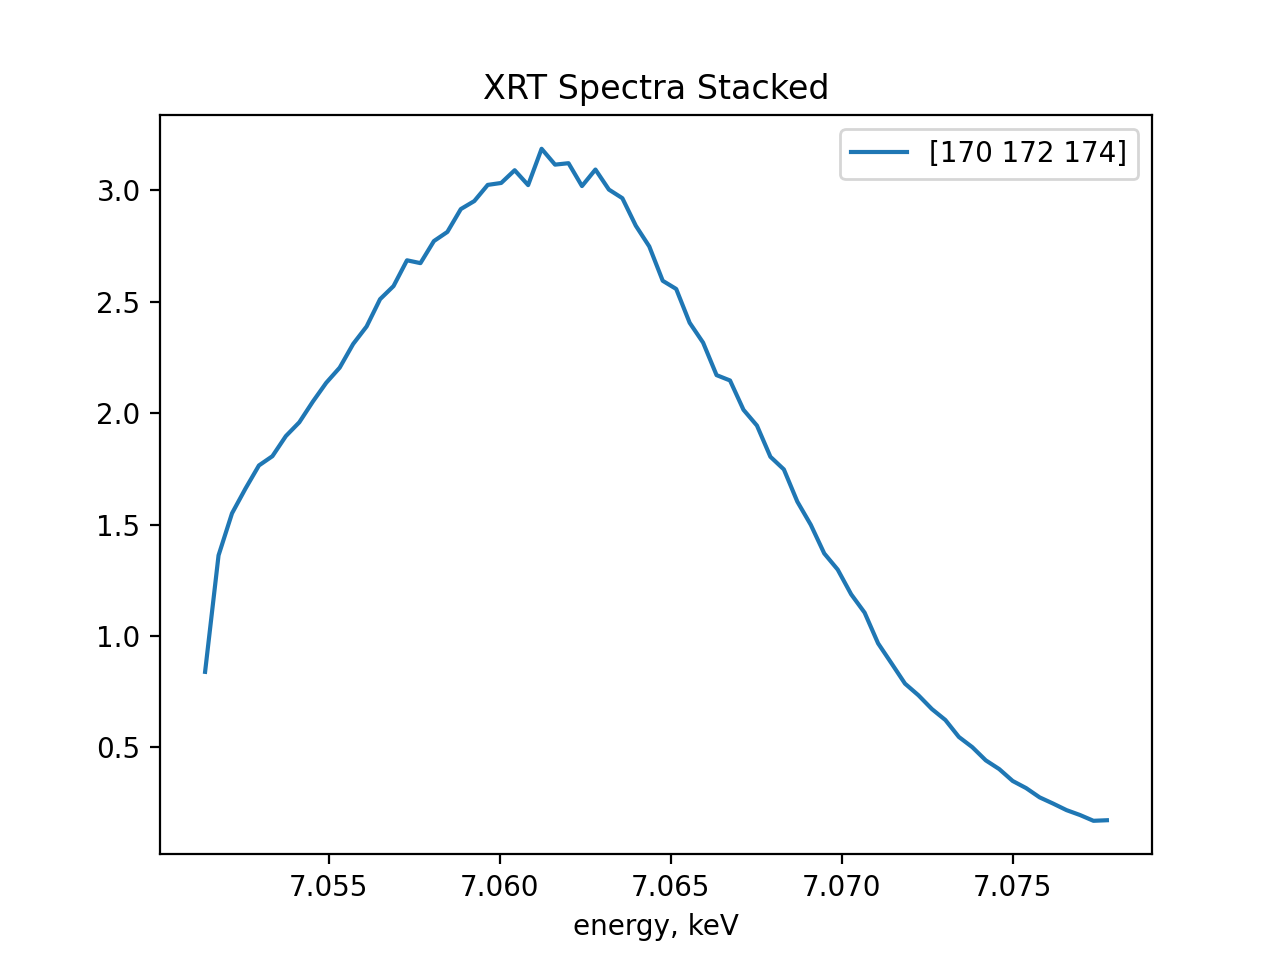

<IPython.core.display.Javascript object>


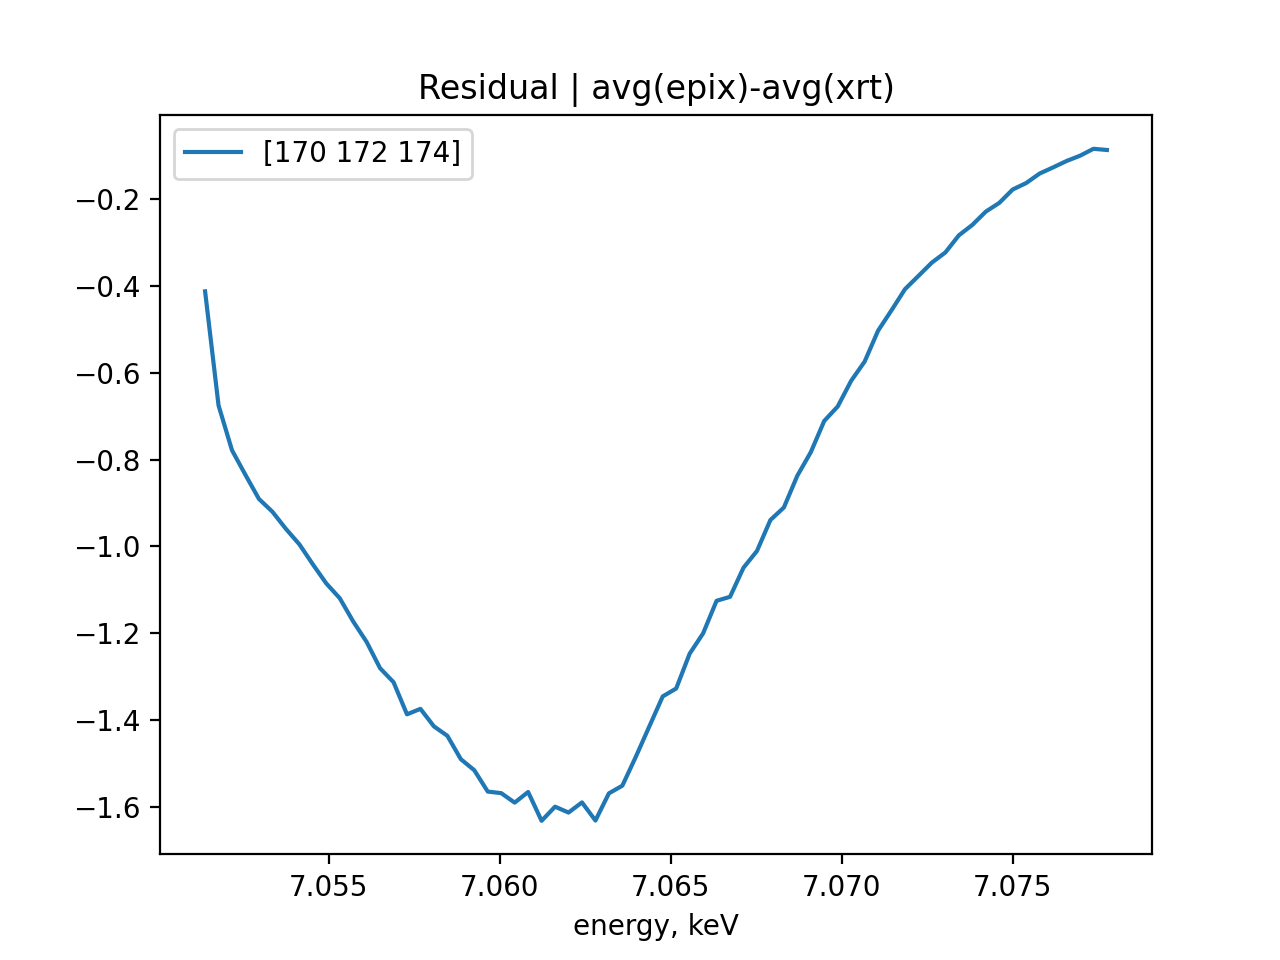

<IPython.core.display.Javascript object>


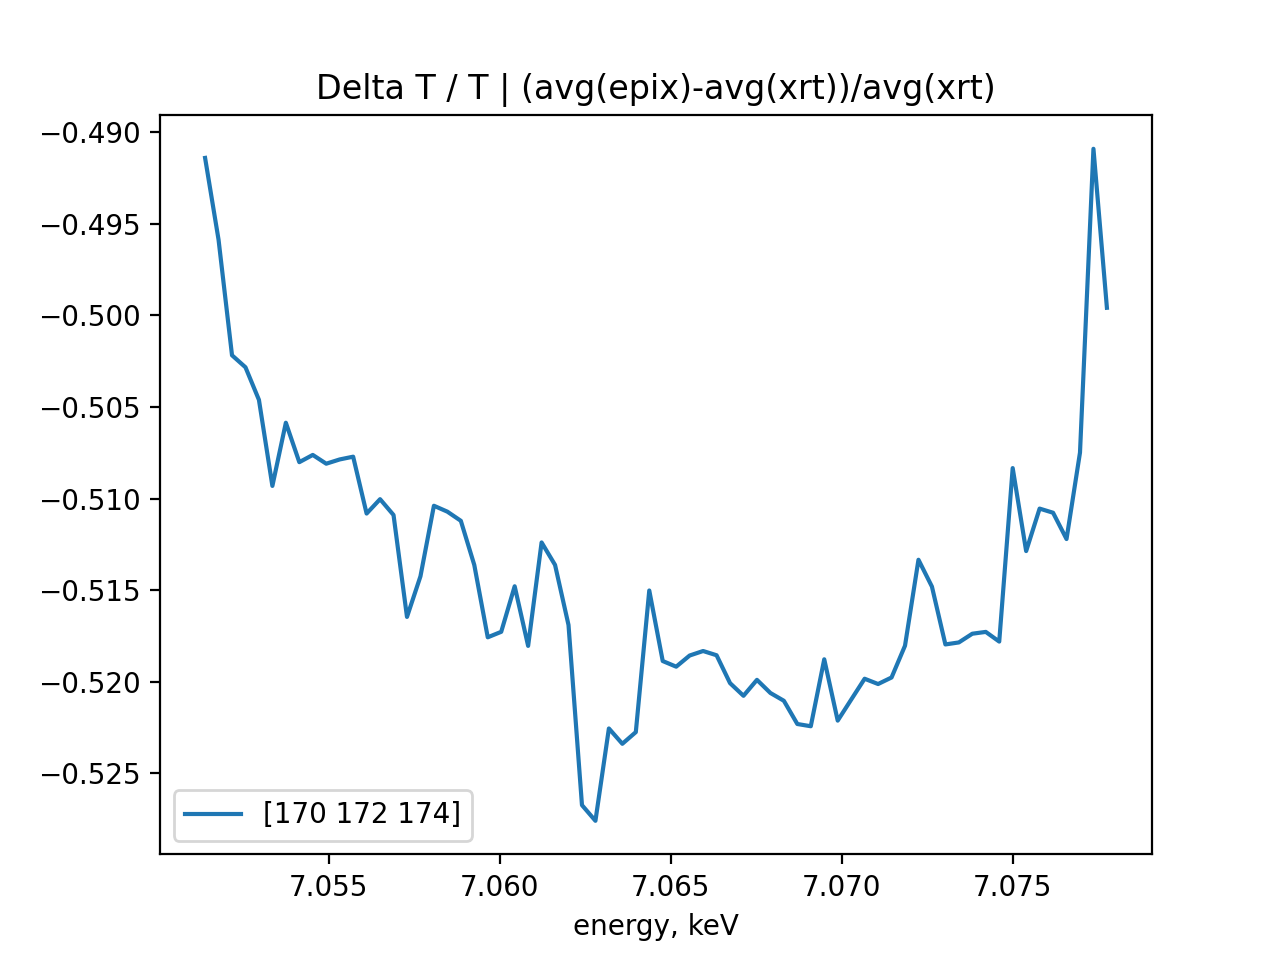

<IPython.core.display.Javascript object>


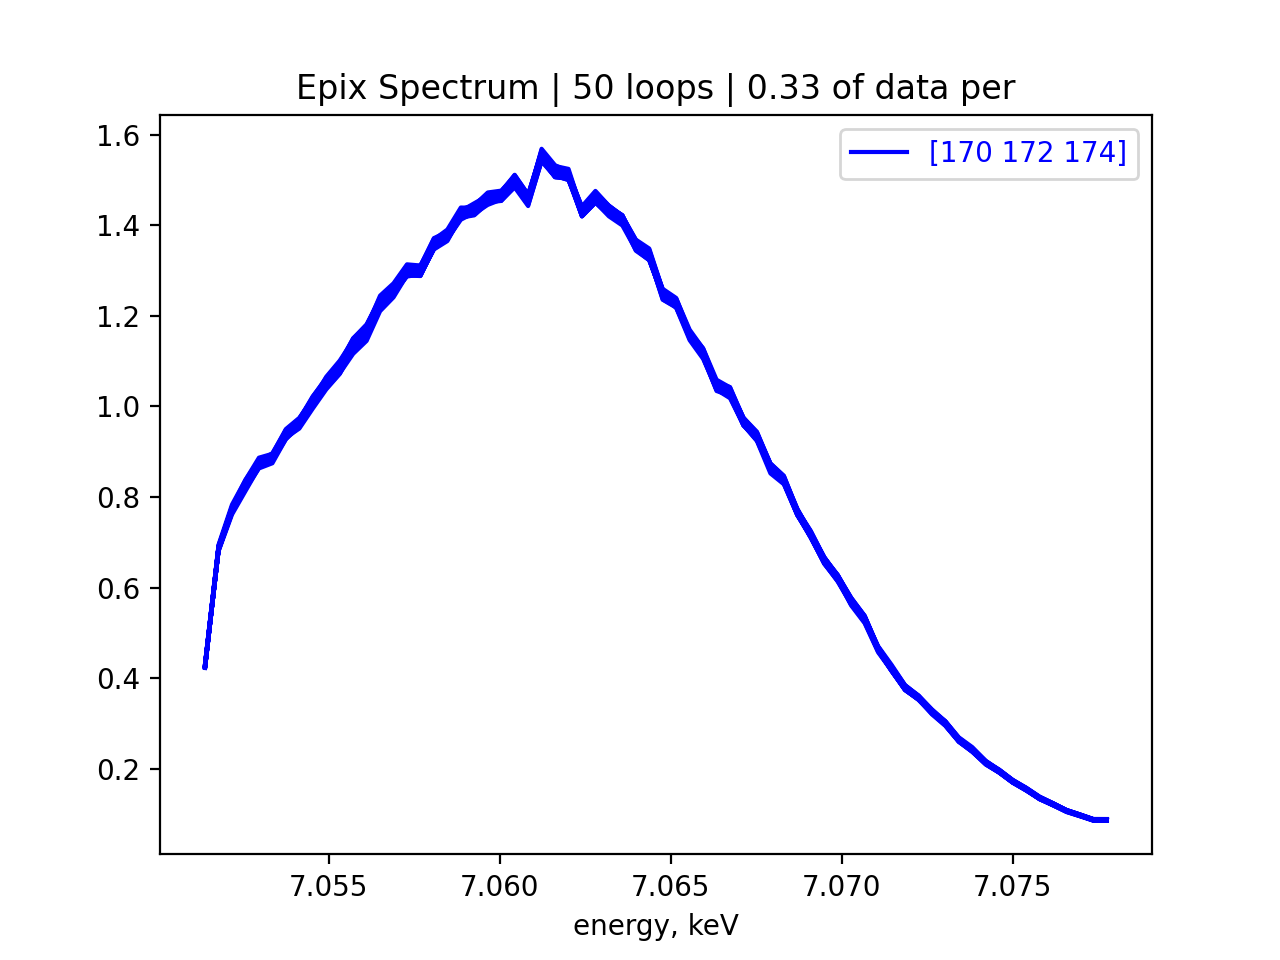

<IPython.core.display.Javascript object>


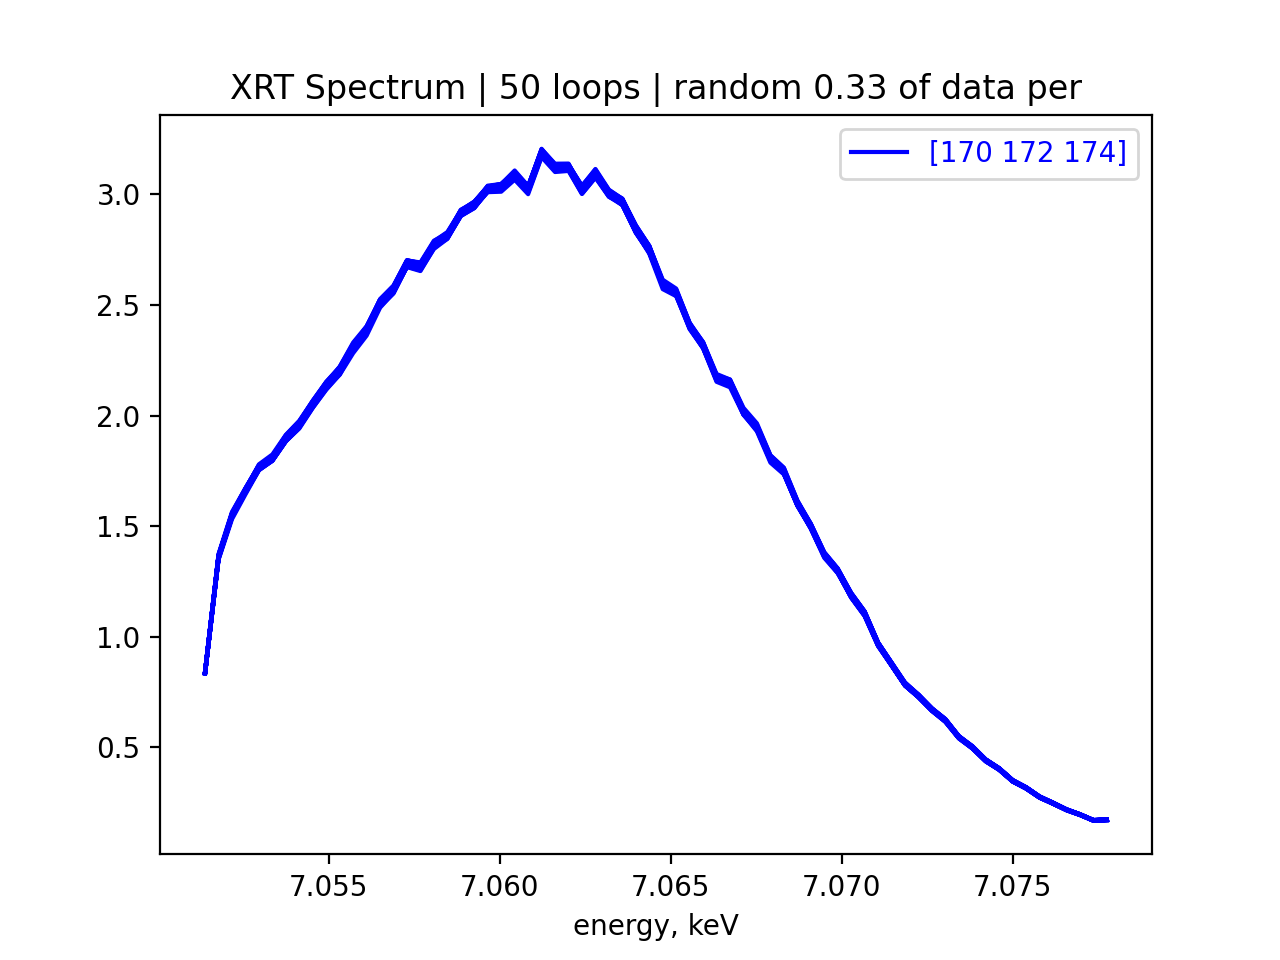

<IPython.core.display.Javascript object>


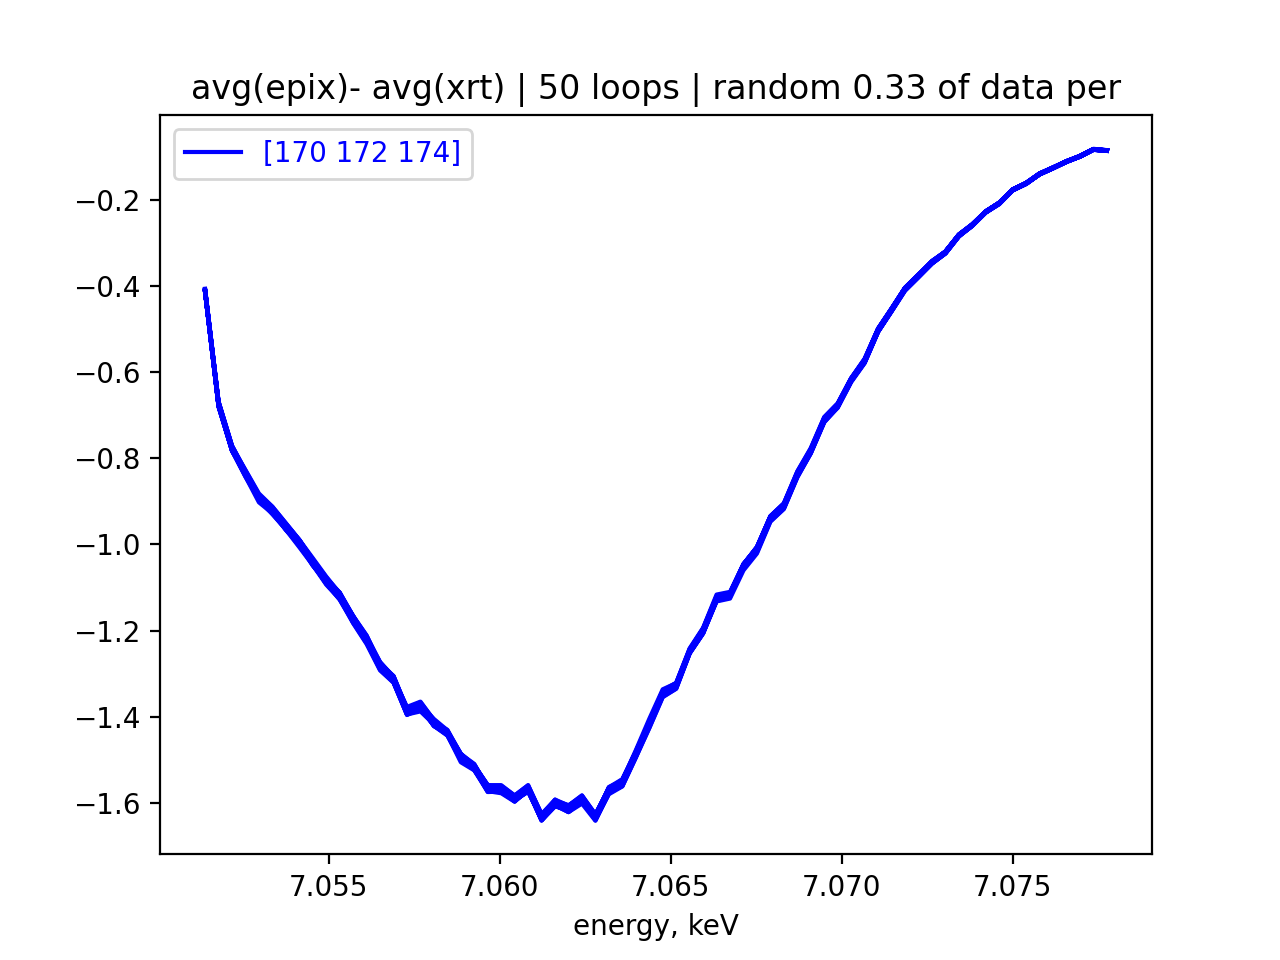

<IPython.core.display.Javascript object>


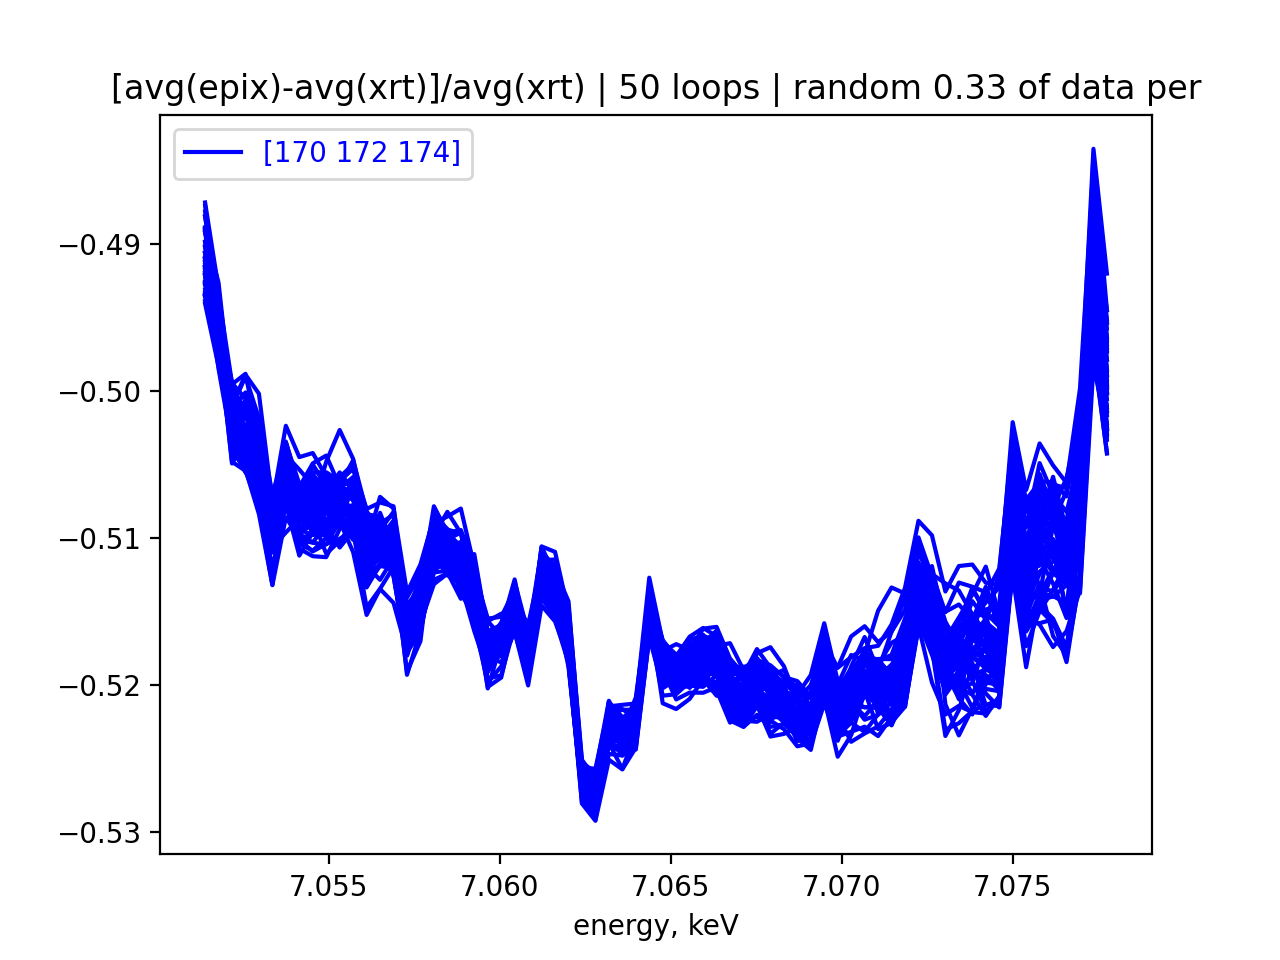

In [6]:
set_0 = [170,172,174]
# set_0 = [115,117,120]           
# set_1 = [116,119,121]
# set_2 = [136,138,140]
# set_3 = [137,139,141]
# set_4 = [124,126,128]
# set_5 = [123,125,127]
# set_6 = [129,131,133]
# set_7 = [130,132,135]

spec_cal_runs = [[166,167]]  # Select runs with no sample in line

scans_to_plot = set_0#,set_1,set_2,set_3,set_4,set_5,set_6,set_7
                         

plot_conds = [True,True,True,True] # epix, xrt, resid, deltaT_T
plot_meanwise = True                 # deltaT_T like avg(epix)-avg(xrt))/avg(xrt)
plot_shotwise = False                  # deltaT_T like avg[(epix-xrt)/xrt] shot by shot
bootstrap = [True,50,1/3]            # how many loops, and what random fraction of data per loop



#################################      DON'T WORRY ABOUT THE LINES UNDER THIS #########################################
if type(scans_to_plot) is list:
    scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]
runs = np.append(np.concatenate(spec_cal_runs),np.concatenate(scans_to_plot))
runs = runs.tolist()
input_vars = [scans_to_plot,spec_cal_runs,plot_conds,plot_shotwise,plot_meanwise,runs,bootstrap]
pro_datas = load_pro.load_pro(runs)
plot_pro.plot_lots(pro_datas,input_vars)

In [ ]:
### Create two sets of variables to compare different calibration runs

set_0 = [167]
spec_cal_runs = [[108,109]]  # Select runs with no sample in line
scans_to_plot = set_0

cset_0 = [155,156]
cspec_cal_runs = [[168,169]]  # Select runs with no sample in line for comparison
cscans_to_plot = cset_0

plot_conds = [True,True,True,True] # epix, xrt, resid, deltaT_T
plot_meanwise = True                 # deltaT_T like avg(epix)-avg(xrt))/avg(xrt)
plot_shotwise = True                  # deltaT_T like avg[(epix-xrt)/xrt] shot by shot
bootstrap = [True,50,1/3]            # how many loops, and what random fraction of data per loop

#################################      DON'T WORRY ABOUT THE LINES UNDER THIS ##################################
if type(scans_to_plot) is list:
    scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]
runs = np.append(np.concatenate(spec_cal_runs),np.concatenate(scans_to_plot))
runs = runs.tolist()
input_vars1 = [scans_to_plot,spec_cal_runs,plot_conds,plot_shotwise,plot_meanwise,runs,bootstrap]
pro_datas1 = load_pro.load_pro(runs)

### create second set of vars for comparison

set_0 = cset_0

spec_cal_runs = cspec_cal_runs  # Select runs with no sample in line
scans_to_plot = set_0#,set_1,set_2,set_3,set_4,set_5,set_6,set_7

if type(scans_to_plot) is list:
    scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]
runs = np.append(np.concatenate(spec_cal_runs),np.concatenate(scans_to_plot))
runs = runs.tolist()
input_vars = [scans_to_plot,spec_cal_runs,plot_conds,plot_shotwise,plot_meanwise,runs,bootstrap]
pro_datas = load_pro.load_pro(runs)

comp_plot_pro.plot_lots_comp(pro_datas1,input_vars1,pro_datas,input_vars)